In [28]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('t2kyoung_wcountry_wcontrib_everyone.csv')
# Convert the time to datetime
df['Member since']=pd.to_datetime(df['Member since'], format='%Y-%m-%d')

def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except:
        return pd.NaT  # Not a Time (pandas' version of None for datetime)

df['Last contribution'] = df['Last contribution'].apply(parse_date)

In [2]:
#I know I shouldn't edit the dataframe in this way, but is OK
new_aff = []
for x in df['Institute'].to_numpy():
    if 'IN2P3' in x:
        x=x.replace('(IN2P3)', 'IN2P3')
    elif 'WPI' in x:
        x=x.replace('(WPI)', 'WPI')
        
    new_aff.append(x)

df['Institute'] = new_aff

In [3]:
country_to_region_map = {'Belgium':'Europe', 'CERN':'Europe', 'Canada':'America', 'France':'Europe', 'Germany':'Europe', 'Hungary':'Europe',
       'Italy':'Europe', 'Japan':'Asia', 'Poland':'Europe', 'Russia':'Europe', 'Spain':'Europe', 'Switzerland':'Europe', 'UK':'Europe',
       'USA':'America', 'Vietnam':'Asia'}

In [4]:
df['Region'] = [country_to_region_map[x] for x in df['Country']]

In [5]:
df_msc = df.loc['Student MSc' == df.Position]
df_phd = df.loc['Student PhD' == df.Position]
df_drs = df.loc['Postdoc' == df.Position]
df_yng = df.loc['Faculty' != df.Position]
df_fac = df.loc['Faculty' == df.Position]

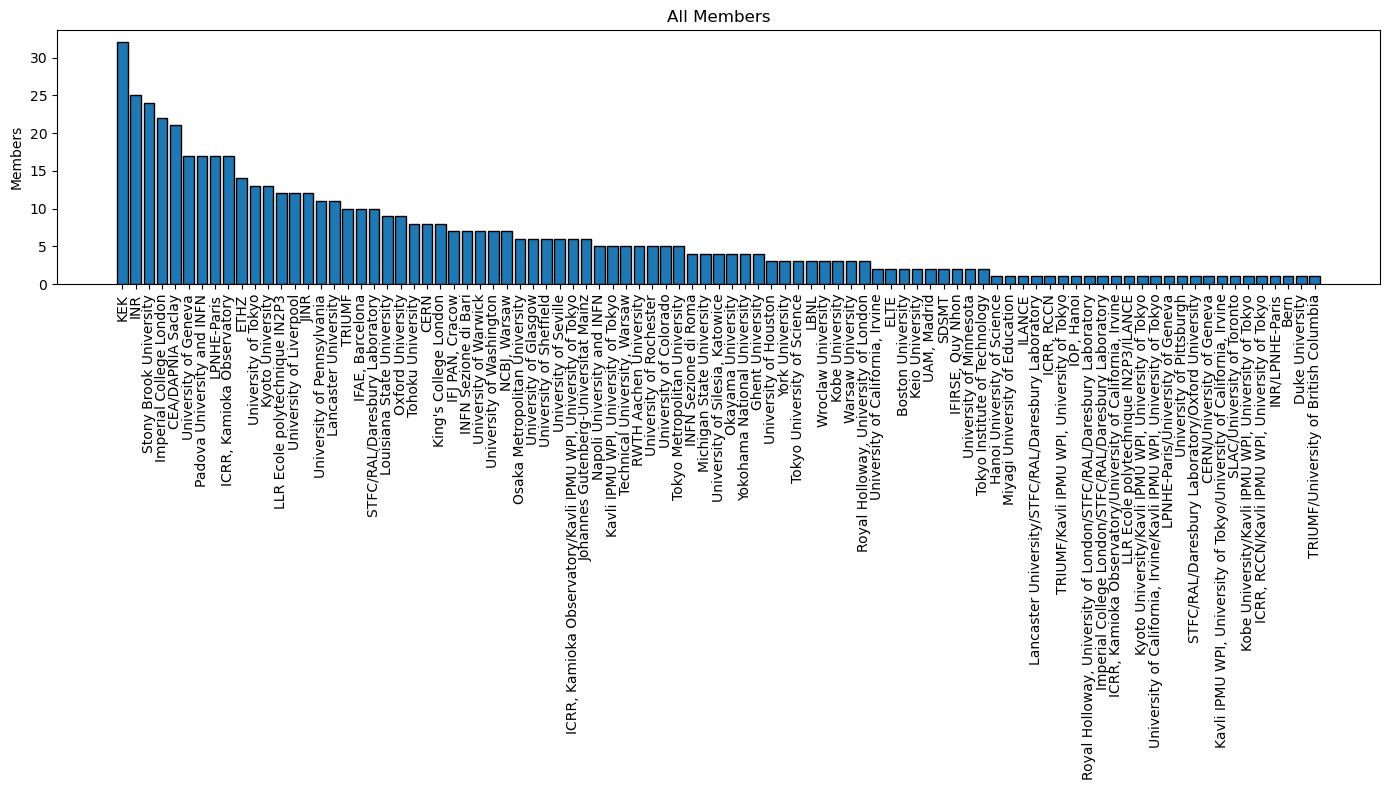

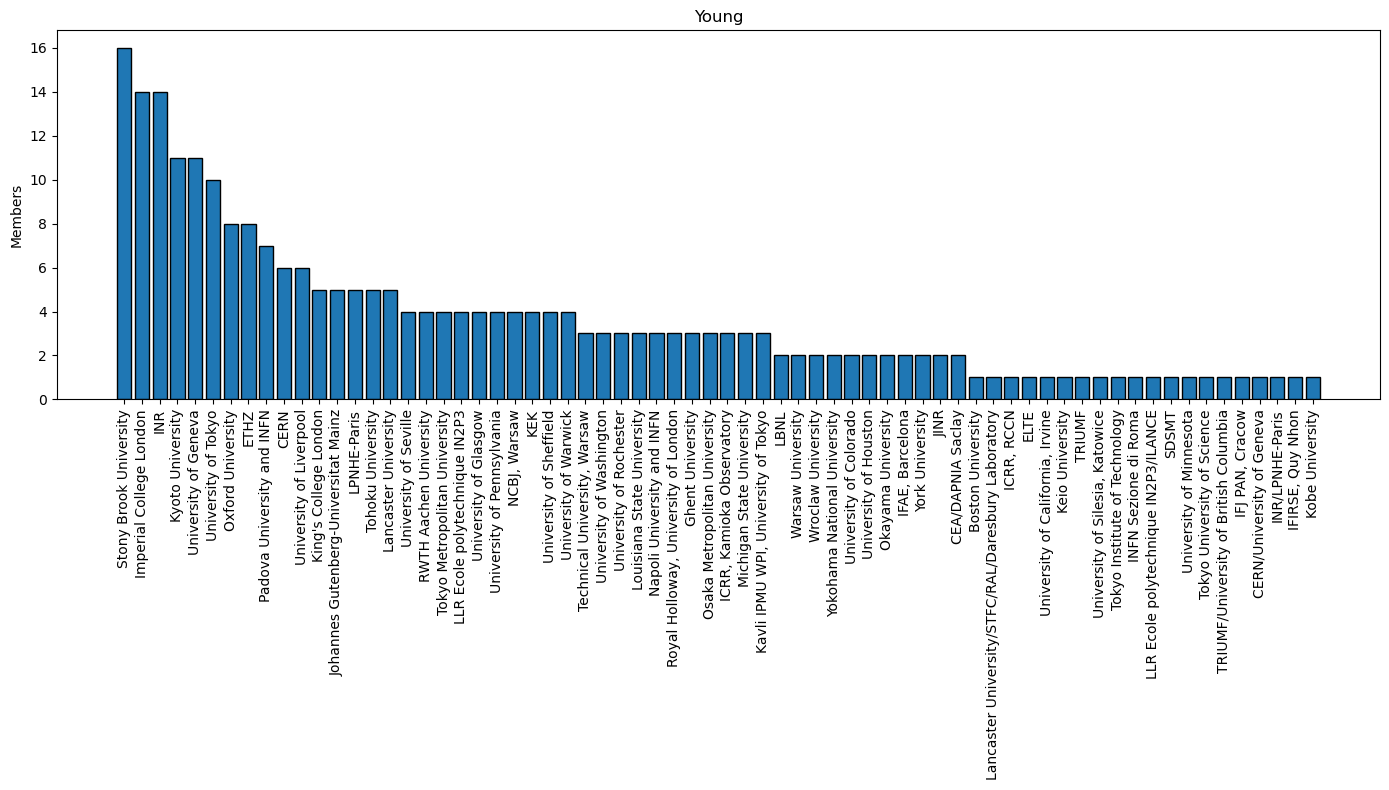

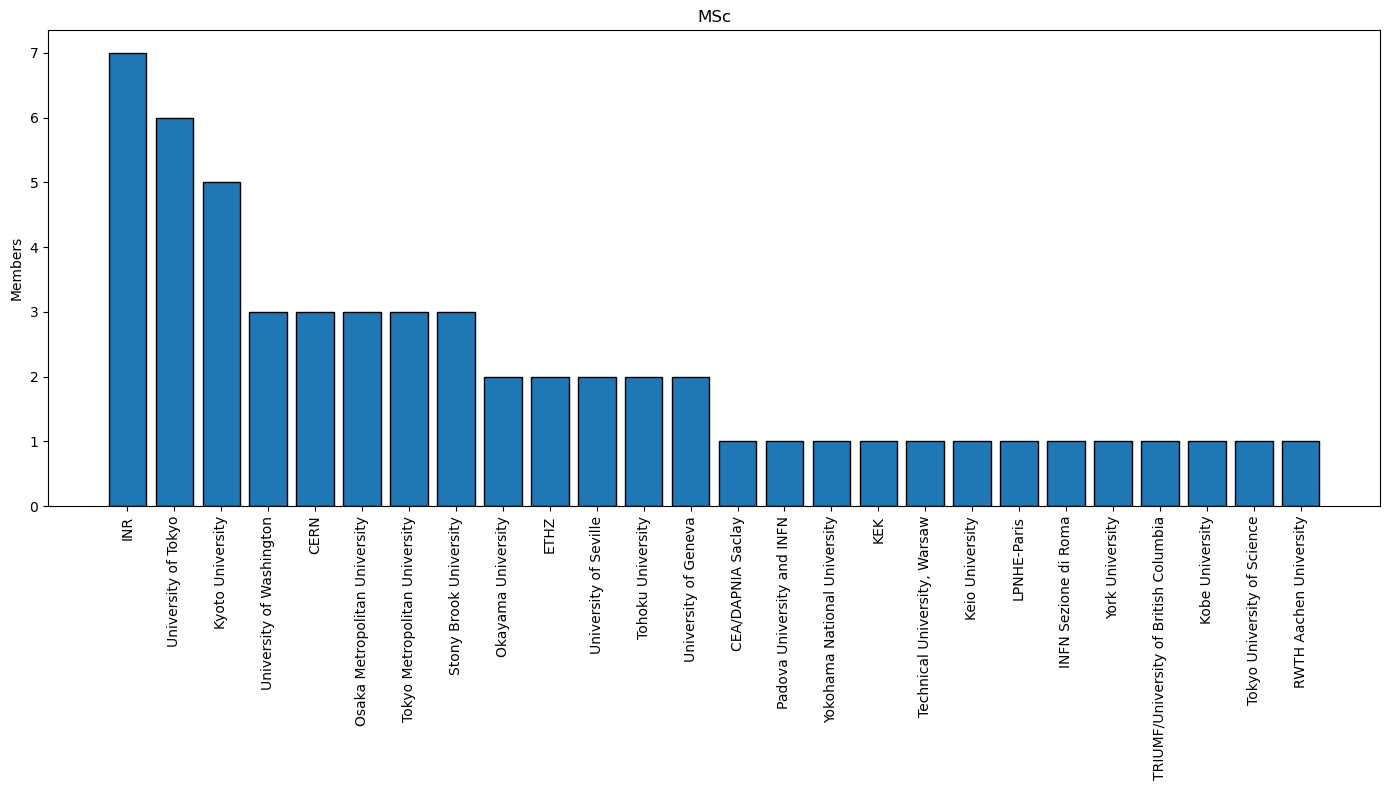

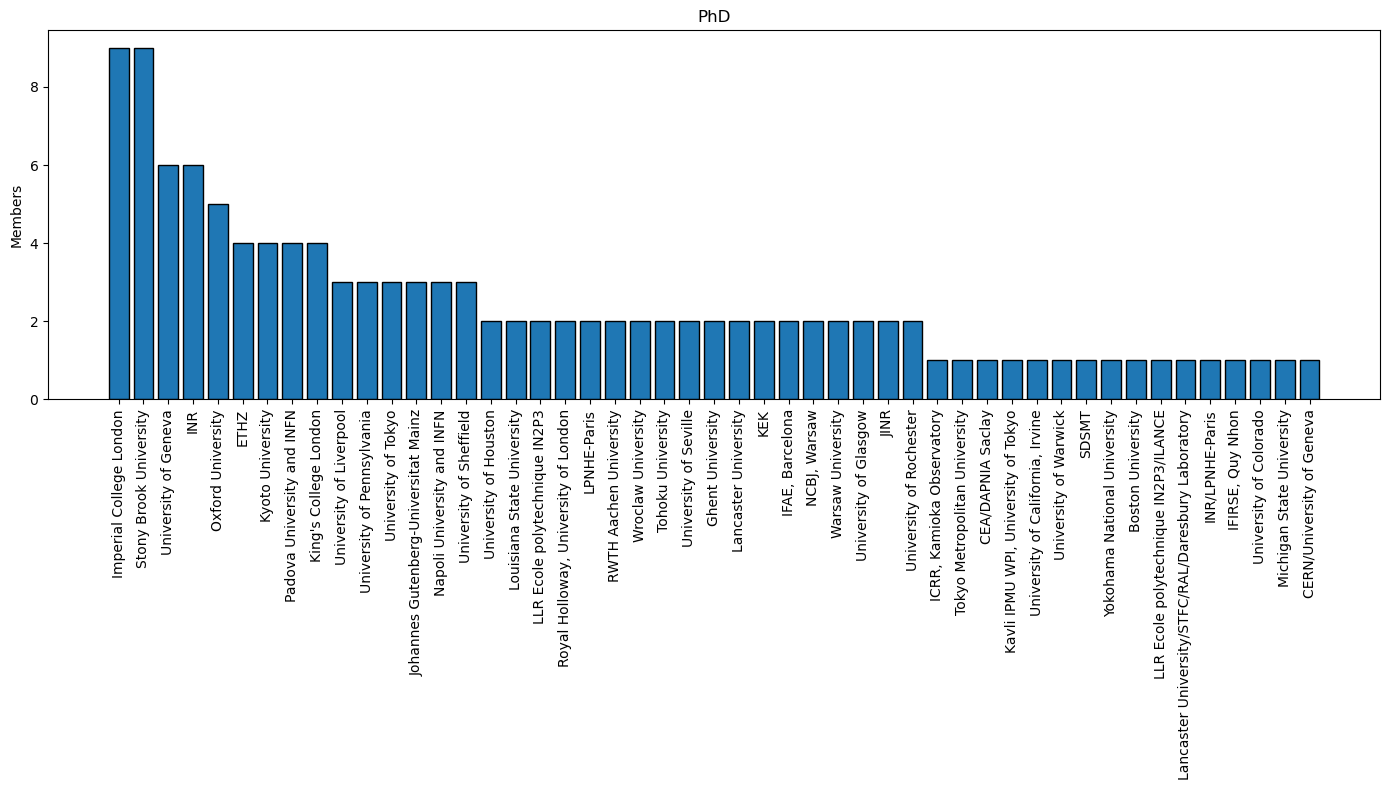

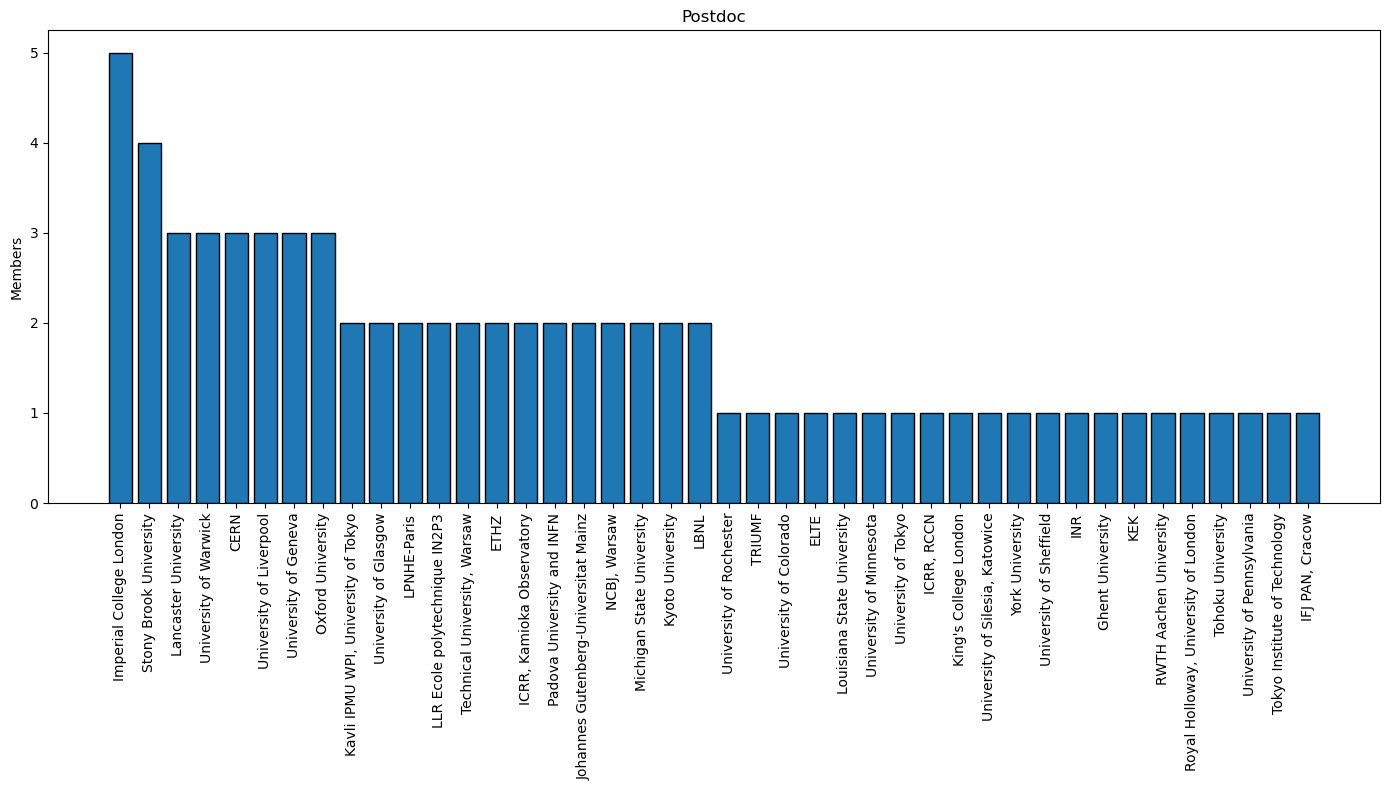

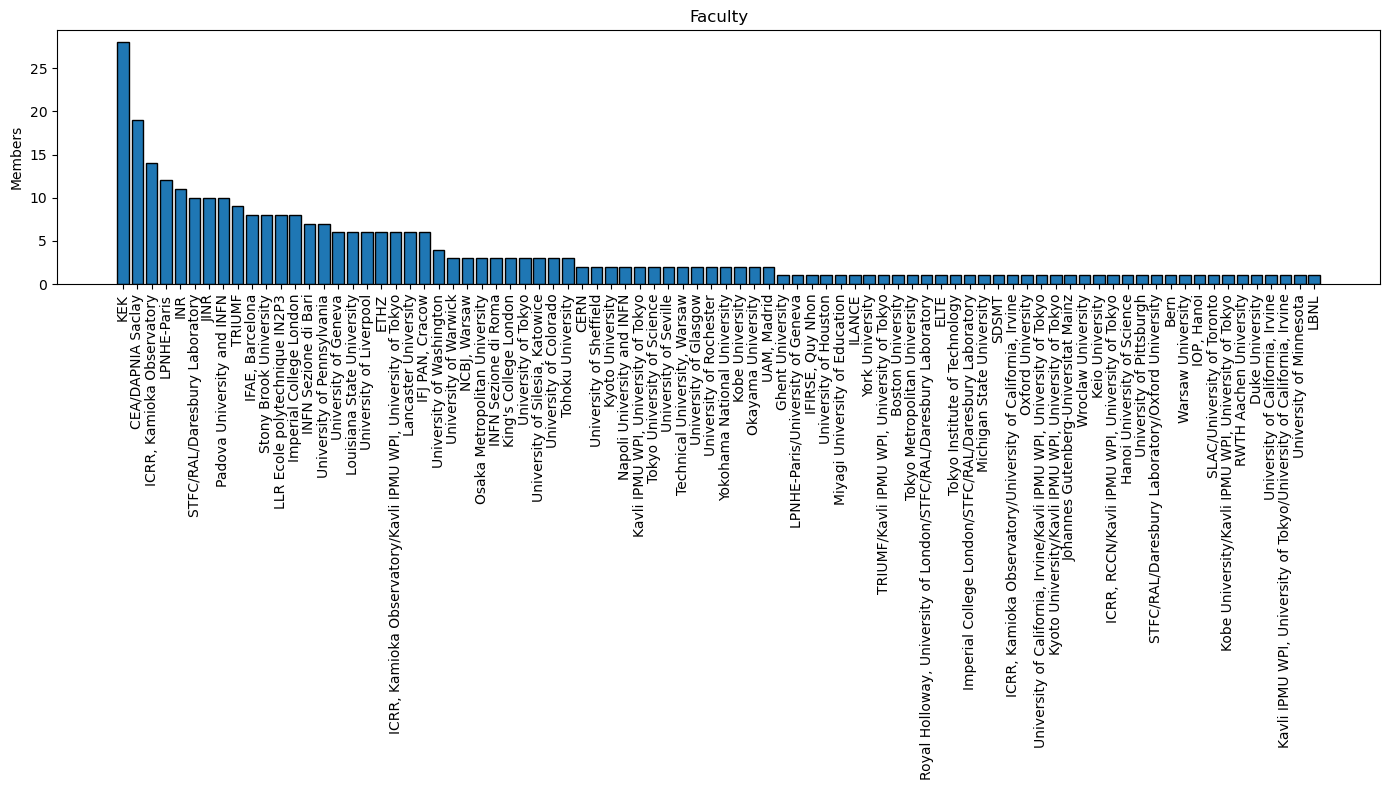

In [6]:
the_tested_df = [df, df_yng, df_msc, df_phd, df_drs, df_fac]
labels = ['All Members', 'Young', 'MSc', 'PhD', 'Postdoc', 'Faculty']

for the_df, name in zip(the_tested_df,labels):

    # Assuming 'df' is your dataframe and 'Country' is the column you want to plot
    country_counts = the_df['Institute'].value_counts()
    
    # Sort the counts in descending order
    sorted_country_counts = country_counts.sort_values(ascending=False)
    
    # Create the histogram plot
    plt.figure(figsize=(14, 8))
    plt.bar(sorted_country_counts.index, sorted_country_counts.values, edgecolor='black')
    
    # Set the positions and labels for the x-axis
    plt.xticks(rotation=90, ha='center')
    
    # Adjust layout to make sure labels fit
    plt.tight_layout()
    
    # Set labels and title
    #plt.xlabel('Country')
    plt.ylabel('Members')
    plt.title(name)
    
    # Display the plot
    #plt.show()
    plt.tight_layout()
    plt.savefig('intitute_'+name+'.pdf')
    

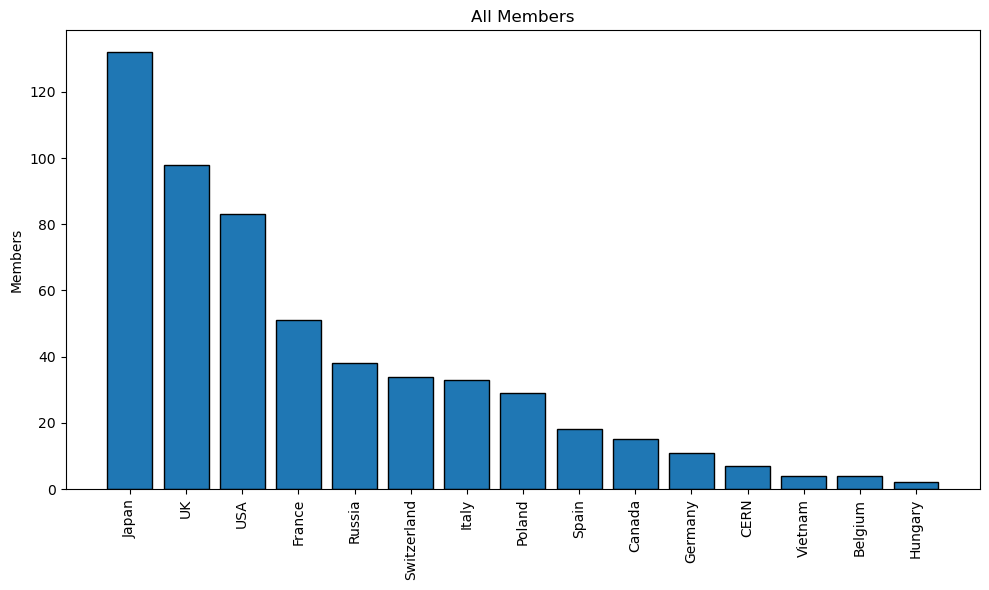

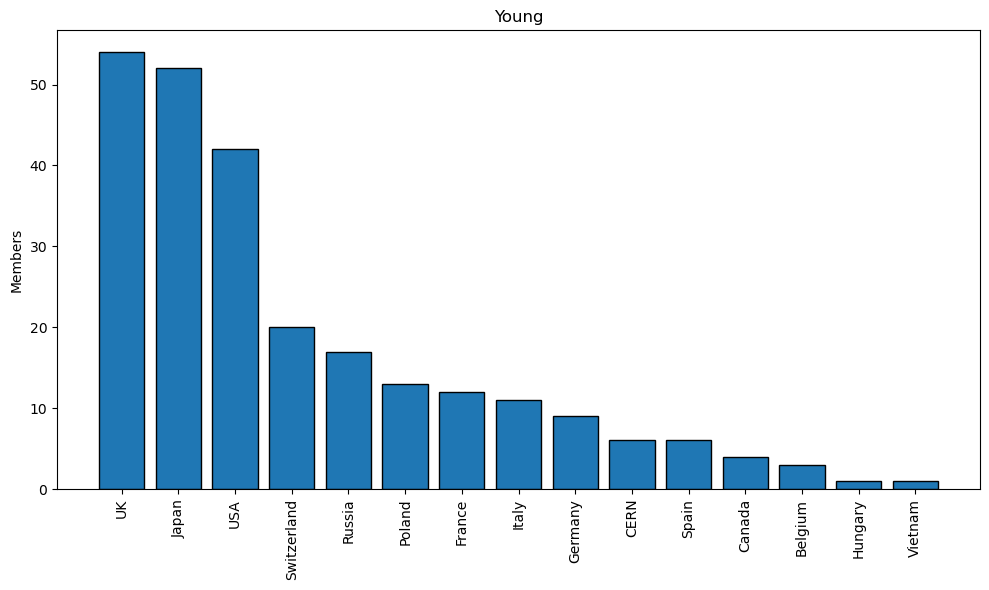

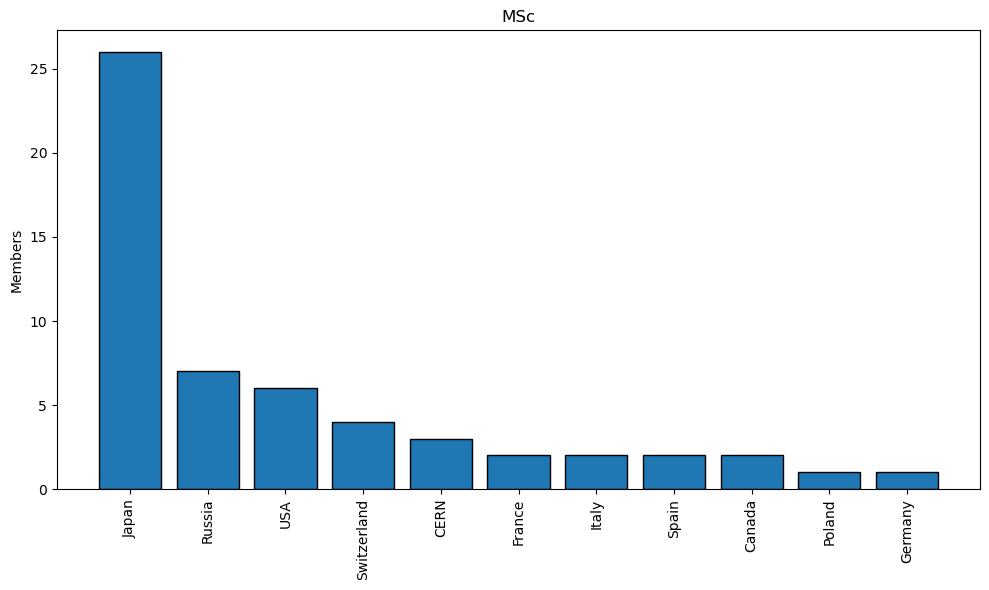

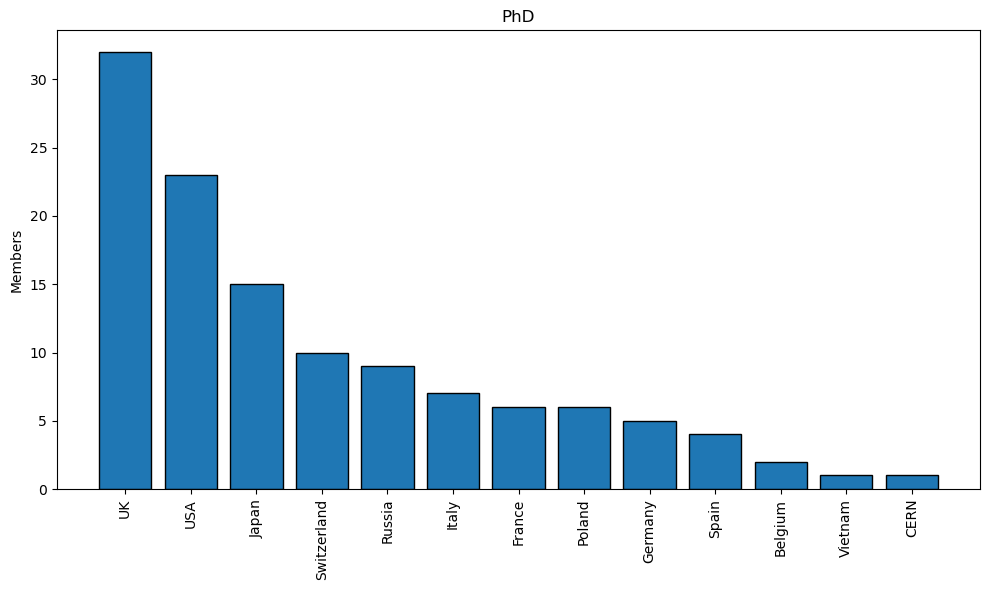

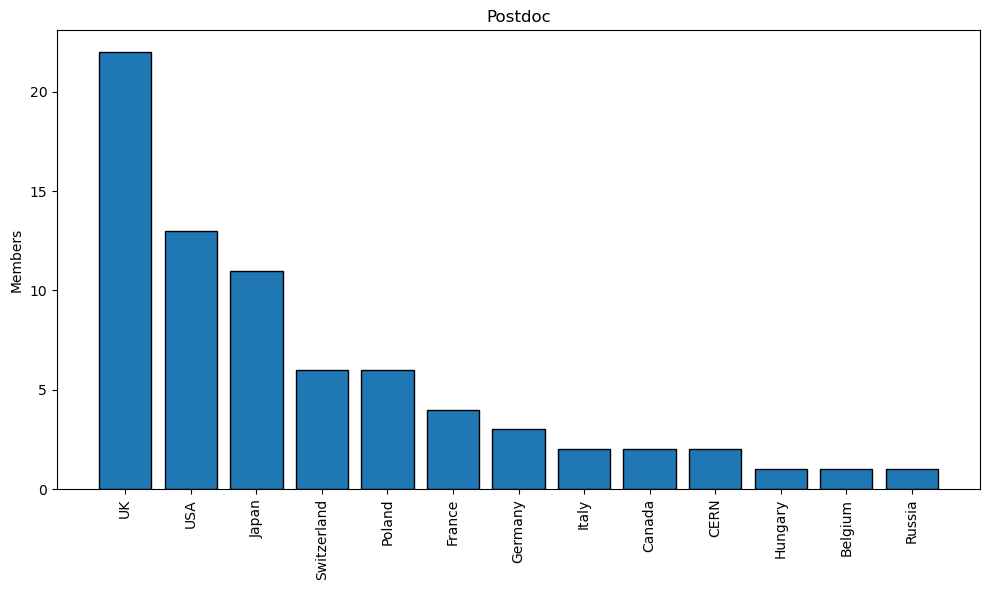

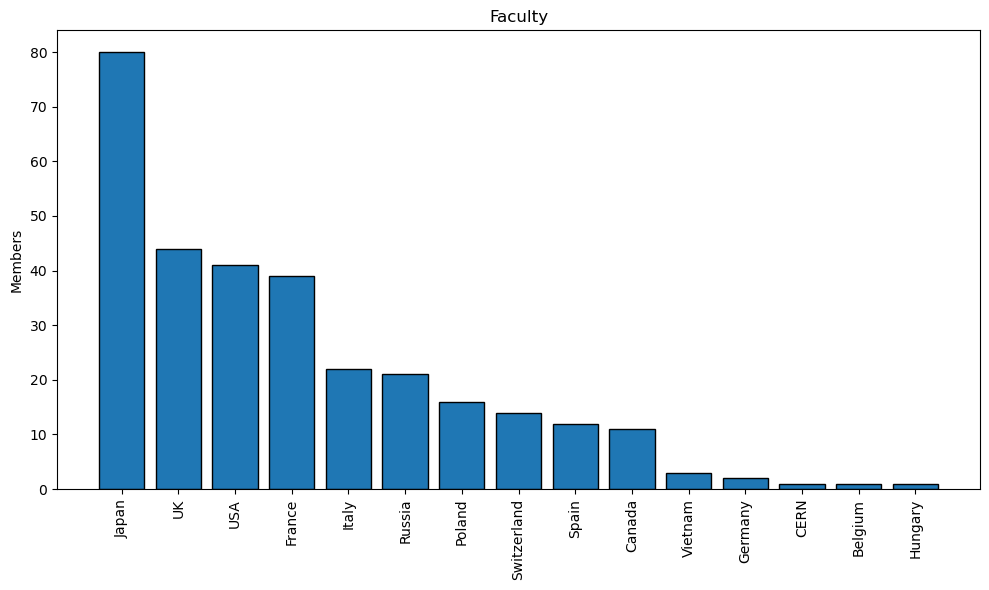

In [7]:
the_tested_df = [df, df_yng, df_msc, df_phd, df_drs, df_fac]
labels = ['All Members', 'Young', 'MSc', 'PhD', 'Postdoc', 'Faculty']

for the_df, name in zip(the_tested_df,labels):

    # Assuming 'df' is your dataframe and 'Country' is the column you want to plot
    country_counts = the_df['Country'].value_counts()
    
    # Sort the counts in descending order
    sorted_country_counts = country_counts.sort_values(ascending=False)
    
    # Create the histogram plot
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_country_counts.index, sorted_country_counts.values, edgecolor='black')
    
    # Set the positions and labels for the x-axis
    plt.xticks(rotation=90, ha='center')
    
    # Adjust layout to make sure labels fit
    plt.tight_layout()
    
    # Set labels and title
    #plt.xlabel('Country')
    plt.ylabel('Members')
    plt.title(name)
    
    # Display the plot
    plt.tight_layout()
    plt.savefig('country_'+name+'.pdf')


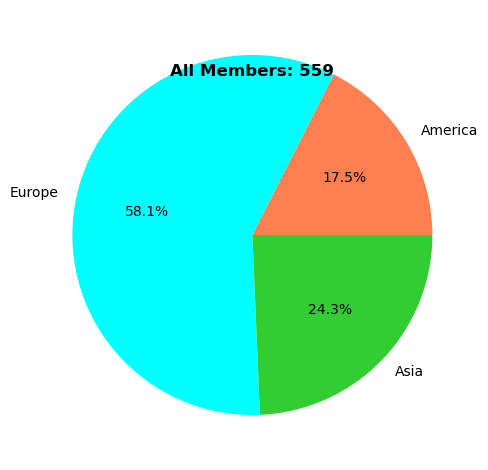

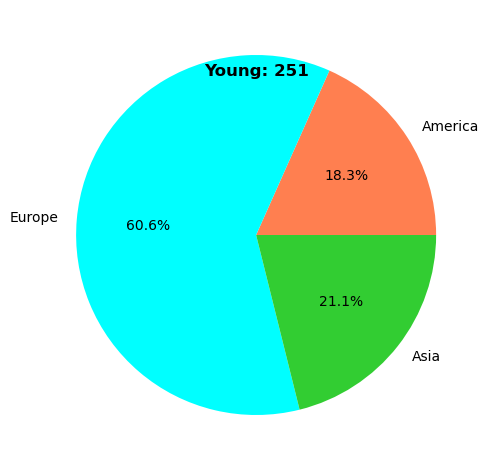

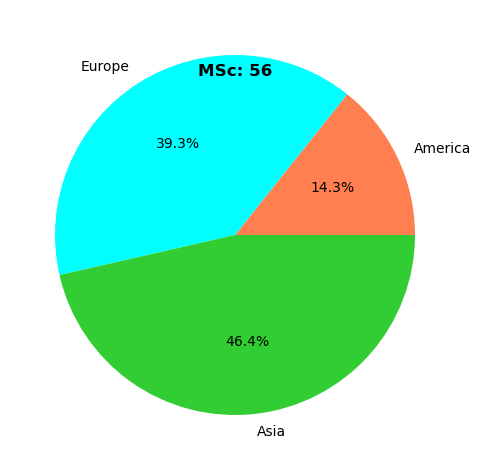

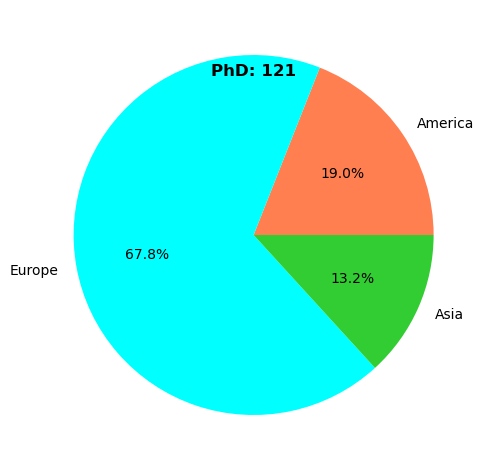

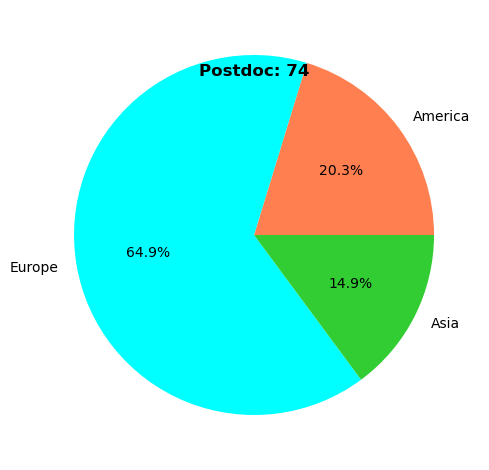

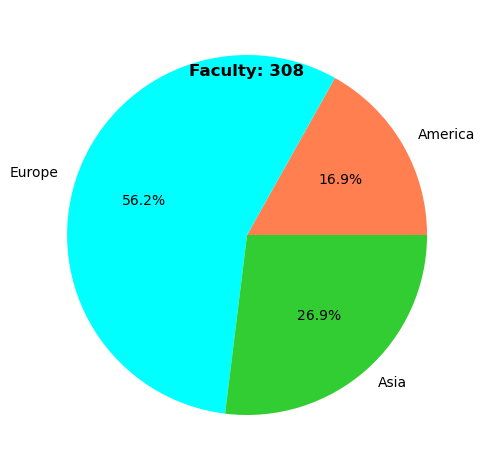

In [8]:
the_tested_df = [df, df_yng, df_msc, df_phd, df_drs, df_fac]
labels = ['All Members', 'Young', 'MSc', 'PhD', 'Postdoc', 'Faculty']

for the_df, name in zip(the_tested_df,labels):

    df_am = the_df.loc['America' == the_df.Region]
    df_eu = the_df.loc['Europe' == the_df.Region]
    df_as = the_df.loc['Asia' == the_df.Region]
    
    labels = 'America', 'Europe', 'Asia'
    sizes = [len(df_am), len(df_eu), len(df_as)]
    fig, ax = plt.subplots()
    _ = ax.pie(sizes, labels=labels,  colors=['coral', 'cyan', 'limegreen'], autopct='%1.1f%%')
    fig.text(0.5, 0.84, name+f': {np.sum(sizes)}', ha='center', va='center', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.savefig('region_'+name+'.pdf')

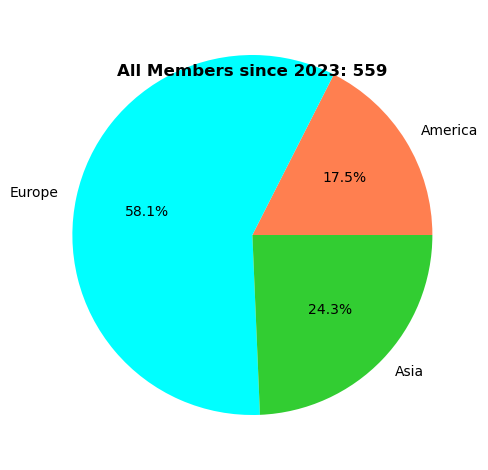

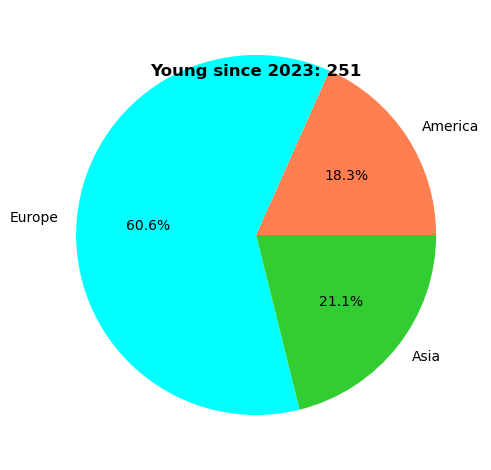

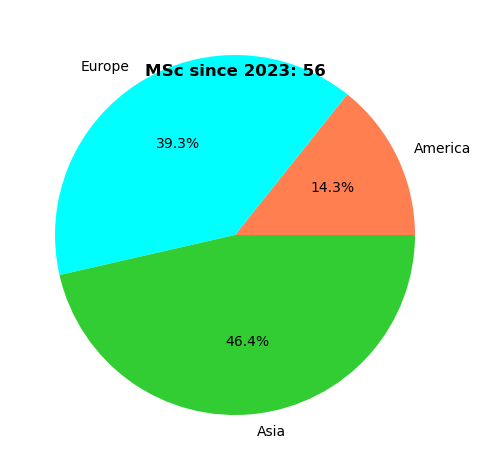

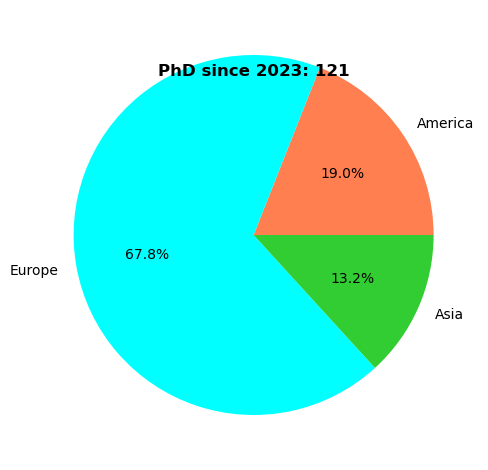

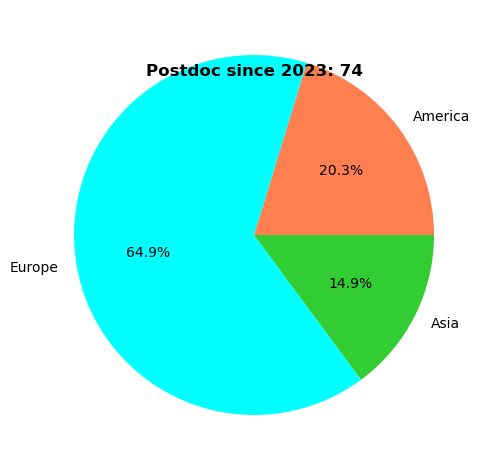

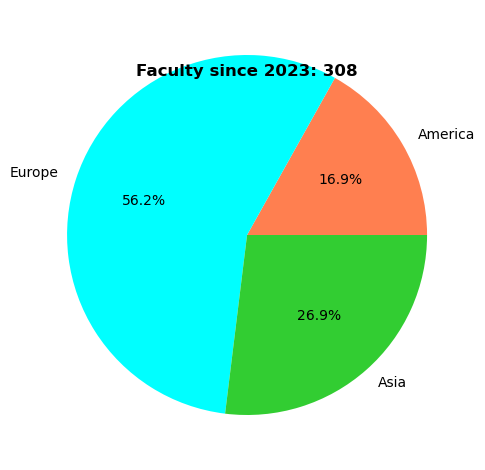

In [9]:
the_tested_df = [df, df_yng, df_msc, df_phd, df_drs, df_fac]
labels = ['All Members', 'Young', 'MSc', 'PhD', 'Postdoc', 'Faculty']

for the_df, name in zip(the_tested_df,labels):

    recent_df = the_df.loc[the_df['Member since'].dt.year>=2023]

    df_am = the_df.loc['America' == the_df.Region]
    df_eu = the_df.loc['Europe' == the_df.Region]
    df_as = the_df.loc['Asia' == the_df.Region]
    
    labels = 'America', 'Europe', 'Asia'
    sizes = [len(df_am), len(df_eu), len(df_as)]
    fig, ax = plt.subplots()
    _ = ax.pie(sizes, labels=labels,  colors=['coral', 'cyan', 'limegreen'], autopct='%1.1f%%')
    fig.text(0.5, 0.84, name+' since 2023'+f': {np.sum(sizes)}', ha='center', va='center', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.savefig('region_recent_'+name+'.pdf')

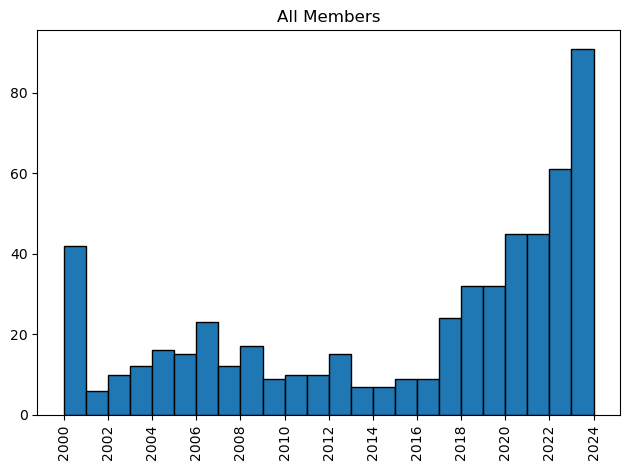

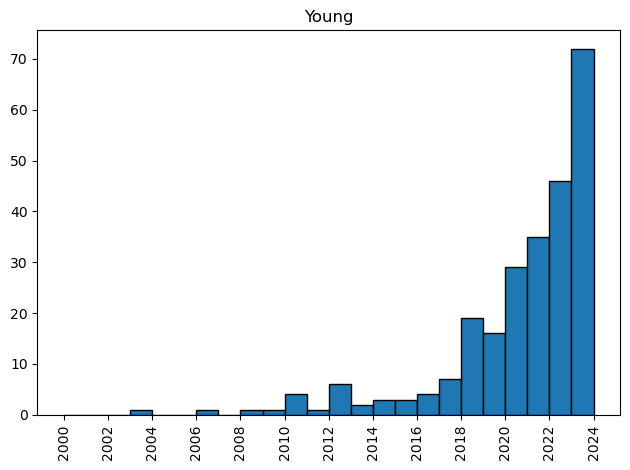

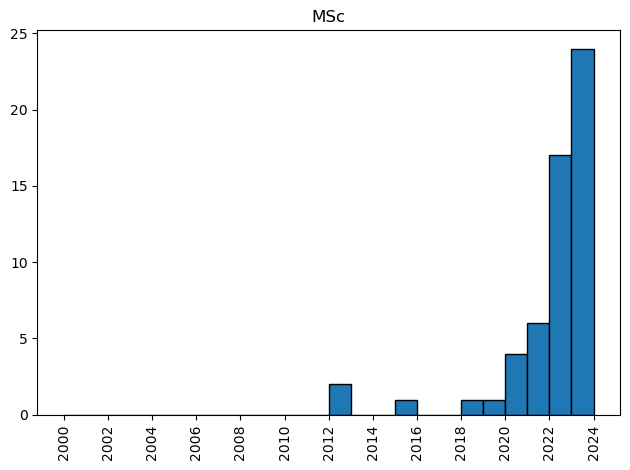

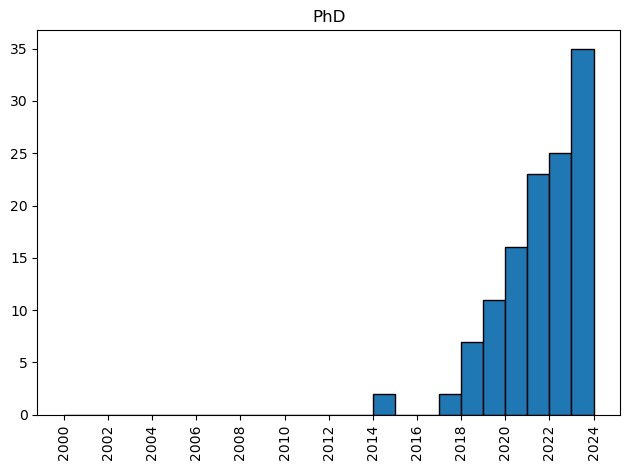

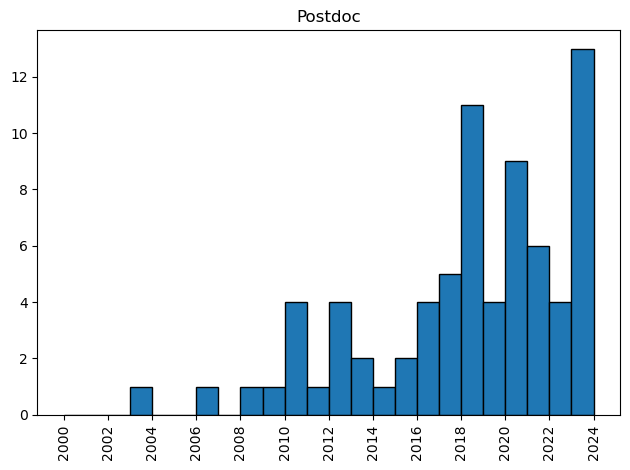

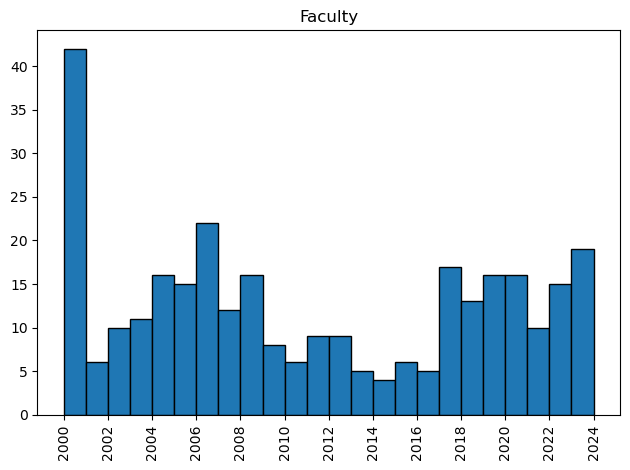

In [10]:
the_tested_df = [df, df_yng, df_msc, df_phd, df_drs, df_fac]
labels = ['All Members', 'Young', 'MSc', 'PhD', 'Postdoc', 'Faculty']

for the_df, name in zip(the_tested_df,labels):
    plt.hist(the_df['Member since'].dt.year, bins=range(2000,2025), edgecolor='black')
    x_ticks = range(2000, 2025, 2)  # This will set ticks every 2 years
    plt.xticks(rotation=90, ha='center')
    _ = plt.gca().set_xticks(x_ticks)
    plt.gca().set_title(name)

    plt.tight_layout()
    plt.savefig('time_in_t2k_'+name+'.pdf')
    plt.show()

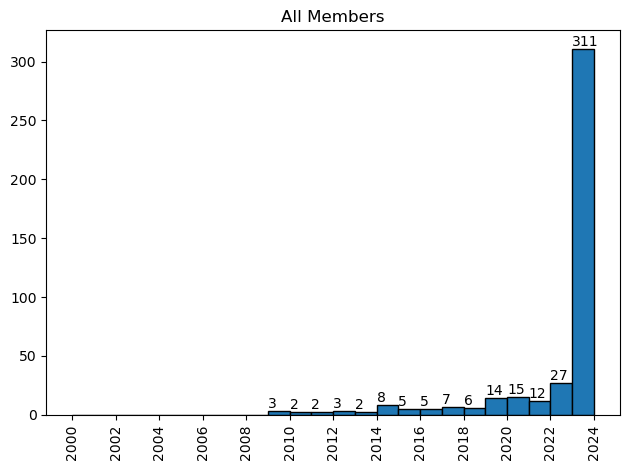

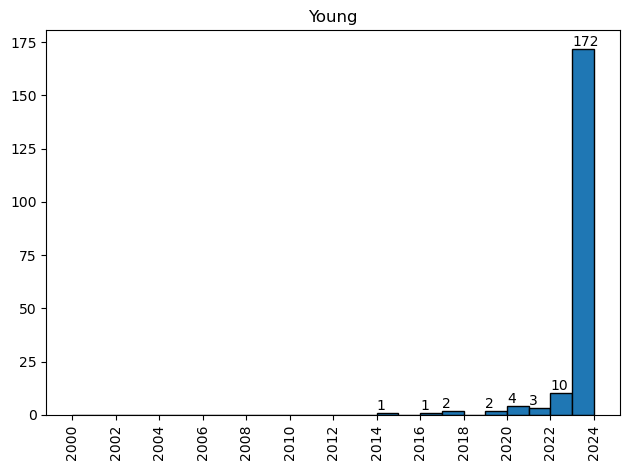

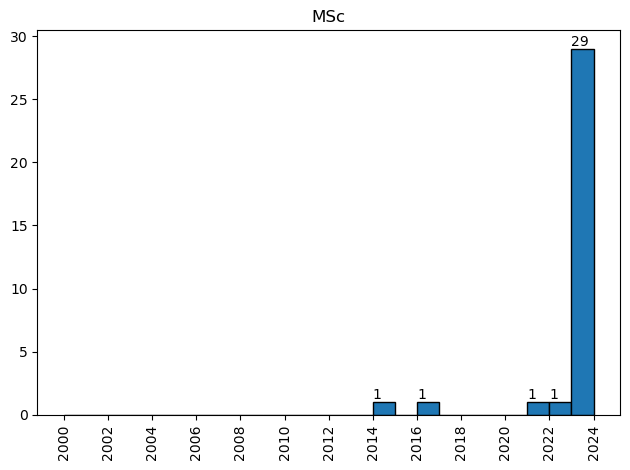

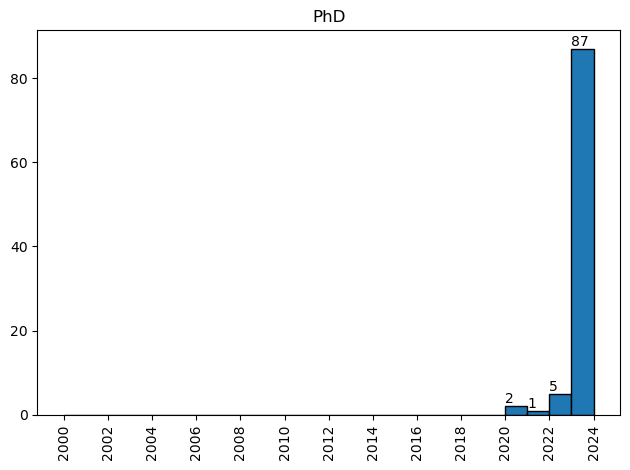

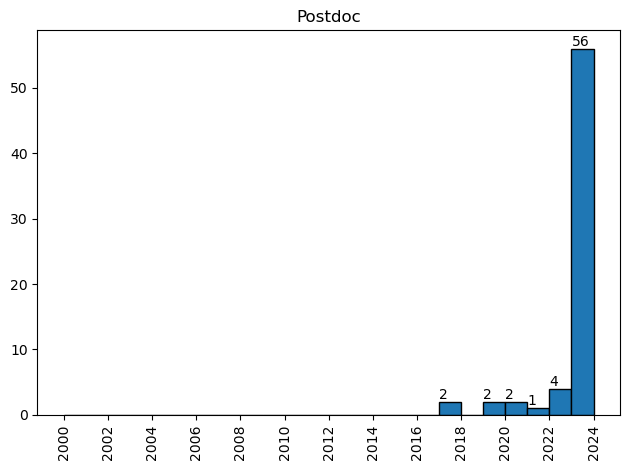

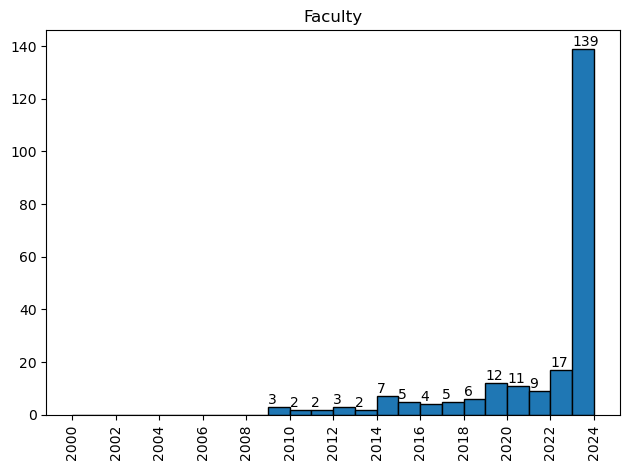

In [11]:
import matplotlib.pyplot as plt
import numpy as np

the_tested_df = [df, df_yng, df_msc, df_phd, df_drs, df_fac]
labels = ['All Members', 'Young', 'MSc', 'PhD', 'Postdoc', 'Faculty']

for the_df, name in zip(the_tested_df, labels):
    counts, bins, _ = plt.hist(the_df['Last contribution'].dt.year, bins=range(2000, 2025), edgecolor='black')
    
    # Add count labels on top of each bar
    for i, count in enumerate(counts):
        if count:
            plt.text(bins[i], count, str(int(count)), ha='left', va='bottom')
    
    x_ticks = range(2000, 2025, 2)  # This will set ticks every 2 years
    plt.xticks(rotation=90, ha='center')
    plt.gca().set_xticks(x_ticks)
    plt.gca().set_title(name)
    plt.tight_layout()
    plt.savefig('last_contrib_in_t2k_' + name + '.pdf')
    plt.show()

In [17]:
pd.set_option('display.max_rows', None)

In [30]:
len(df.loc[df['Last contribution'].dt.year<2030]), len(df)

(422, 559)